In [ ]:
import re
import nltk
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
pd.set_option("display.max_colwidth",200)
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [ ]:
%matplotlib inline

In [ ]:
# Load train file (try comma first, then tab if it looks wrong)
train = pd.read_csv("/content/drive/MyDrive/SentimentAnalysis/train_E6oV3lV.csv", sep="\t", header=None)

In [ ]:
# Load test file
test = pd.read_csv("/content/drive/MyDrive/SentimentAnalysis/test_tweets_anuFYb8.csv", header=None, names=["tweet_id", "label", "tweet"])

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/SentimentAnalysis/train_E6oV3lV.csv')  # Make sure you have this file in your working directory
print(train['label'].value_counts())


label
0    29720
1     2242
Name: count, dtype: int64


In [ ]:
print("Train shape:", train.shape)
print(train)

Train shape: (31962, 3)
          id  label  \
0          1      0   
1          2      0   
2          3      0   
3          4      0   
4          5      0   
...      ...    ...   
31957  31958      0   
31958  31959      0   
31959  31960      0   
31960  31961      1   
31961  31962      0   

                                                                                                                                     tweet  
0                                    @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run  
1               @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked  
2                                                                                                                      bihday your majesty  
3                                                   #model   i love u take with u all the time in urð±!!! ððððð¦ð¦ð

In [ ]:
print(train.columns)

Index(['id', 'label', 'tweet'], dtype='object')


In [ ]:
train = pd.read_csv("/content/drive/MyDrive/SentimentAnalysis/train_E6oV3lV.csv", sep='\t', header=None, names=["tweet_id","label", "tweet"])

In [ ]:
train.shape,test.shape

((31963, 3), (17198, 3))

In [ ]:
print(train.columns)


Index(['tweet_id', 'label', 'tweet'], dtype='object')


alpha=0.5
This means each bar is 50% transparent. When the same bins have bars from both datasets, matplotlib blends the colors:

Blue (train) + Orange (test) = Brown (overlap)

! The brown color in your histogram comes from the overlap between the two histograms:

Blue = train_tweets

Orange = test_tweets

Brown = when blue and orange bars overlap, their colors blend due to alpha=0.5 (transparency), resulting in a mixed color — which appears brown.



Combine Both for Cleaning

In [ ]:
combi = pd.concat([train, test], ignore_index=True)
print(combi.columns)  # Should show: ['tweet_id', 'label', 'tweet']



Index(['tweet_id', 'label', 'tweet'], dtype='object')


In [ ]:
print(train.shape)
print(train.head(3))


(31963, 3)
                                                                                                                         tweet_id  \
0                                                                                                                  id,label,tweet   
1                      1,0, @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run   
2  2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked   

   label  tweet  
0    NaN    NaN  
1    NaN    NaN  
2    NaN    NaN  


In [ ]:
print("Train shape:", train.shape)
print(train.head(3))

print("Test shape:", test.shape)
print(test.head(3))

Train shape: (31963, 3)
                                                                                                                         tweet_id  \
0                                                                                                                  id,label,tweet   
1                      1,0, @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run   
2  2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked   

   label  tweet  
0    NaN    NaN  
1    NaN    NaN  
2    NaN    NaN  
Test shape: (17198, 3)
  tweet_id  \
0       id   
1    31963   
2    31964   

                                                                                                   label  \
0                                                                                                  tweet   
1             #studiolife #aislife #requires #passion #dedication #willpowe

In [ ]:
print(train.columns)
print(test.columns)


Index(['tweet_id', 'label', 'tweet'], dtype='object')
Index(['tweet_id', 'label', 'tweet'], dtype='object')


In [ ]:
import pandas as pd

test = pd.read_csv("/content/drive/MyDrive/SentimentAnalysis/test_tweets_anuFYb8.csv")  # Replace with actual filename you upload
print(test.columns)


Index(['id', 'tweet'], dtype='object')


In [ ]:
print(combi.columns)


Index(['tweet_id', 'label', 'tweet'], dtype='object')


In [ ]:
import pandas as pd
combi = pd.concat([train, test], ignore_index=True)
print(combi.shape)

(49160, 4)


1. Removing Twitter Handles (@user)

In [ ]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

2. Removing Punctuations, Numbers, and Special Characters

2.1 combi DataFrame. Typically, it's created by combining train and test like this:

Apply Pattern Removal and Clean Tweet Text


In [ ]:
# Fill NaN with empty string
combi['tweet'] = combi['tweet'].fillna('')

# Apply regex pattern removal
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*")

# Remove everything except letters and hashtags
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ", regex=True)

# View sample
combi[['tweet', 'tidy_tweet']].head()


,tweet,tidy_tweet
0,,
1,,
2,,
3,,
4,,


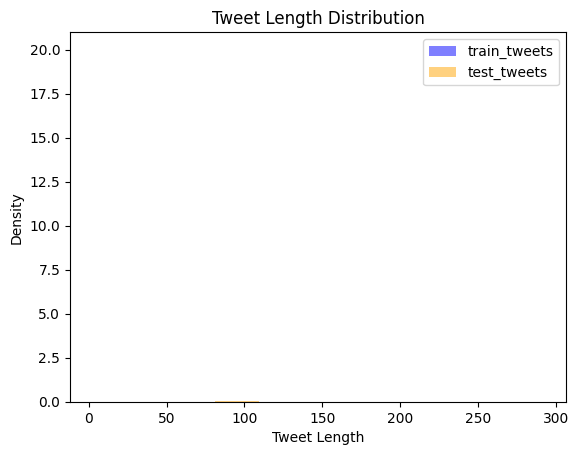

In [ ]:
length_train = train['tweet'].astype(str).str.len()
length_test = test['tweet'].astype(str).str.len()
import matplotlib.pyplot as plt

plt.hist(length_train, bins=20, alpha=0.5, label="train_tweets", color='blue', density=True)
plt.hist(length_test, bins=20, alpha=0.5, label="test_tweets", color='orange', density=True)
plt.legend()
plt.title("Tweet Length Distribution")
plt.xlabel("Tweet Length")
plt.ylabel("Density")
plt.show()

In [ ]:
combi = pd.concat([train, test], ignore_index=True)
combi.shape

(49160, 4)

In [ ]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt


Convert tweets to regular strings before applying regex
1. Removing Twitter Handles (@user)

In [ ]:
combi['tweet'] = combi['tweet'].astype(str)

combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], r"@[\w]*")


In [ ]:
import pandas as pd
import numpy as np
import re

test = pd.read_csv("/content/drive/MyDrive/SentimentAnalysis/test_tweets_anuFYb8.csv", encoding='utf-8', header=None)
test.columns = ['id', 'tweet']


# Make sure tweet column is string
test['tweet'] = test['tweet'].astype(str)

# 1. Remove Twitter handles (@user)
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

test['clean_tweet'] = np.vectorize(remove_pattern)(test['tweet'], r"@[\w]*")

# 2. Remove special characters, numbers, punctuation (keep hashtags and words)
test['clean_tweet'] = test['clean_tweet'].str.replace("[^a-zA-Z#]", " ", regex=True)

# 3. Optional: Convert to lowercase
test['clean_tweet'] = test['clean_tweet'].str.lower()

# View result
test[['tweet', 'clean_tweet']].head()


,tweet,clean_tweet
0,tweet,tweet
1,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterials
2,@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why,#white #supremacists want everyone to see the new #birds #movie and here s why
3,safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!,safe ways to heal your #acne #altwaystoheal #healthy #healing
4,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð #harrypotter #pottermore #favorite",is the hp and the cursed child book up for reservations already if yes where if no when #harrypotter #pottermore #favorite


Removed @user mentions

Removed special characters

Lowercased the tweets

Now your cleaned data is ready for further processing like:

Tokenization

Removing stopwords

Vectorization (TF-IDF or CountVectorizer)

Modeling (classification, clustering, etc.)

🔍 Example Output You Should See
tweet	clean_tweet
@user This is amazing!! 😍 #love	this is amazing love
Happy birthday @john123!!	happy birthday



2. Removing Punctuations, Numbers, and Special Characters
Here we will replace everything except characters and hashtags with spaces. The regular expression "[^a-zA-Z#]" means anything except alphabets and '#'.

In [ ]:
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", "")
combi.head(10)

,tweet_id,label,tweet,id,tidy_tweet
0,"id,label,tweet",NaN,nan,NaN,nan
1,"1,0, @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run",NaN,nan,NaN,nan
2,"2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked",NaN,nan,NaN,nan
3,"3,0, bihday your majesty",NaN,nan,NaN,nan
4,"4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦",NaN,nan,NaN,nan
5,"5,0, factsguide: society now #motivation",NaN,nan,NaN,nan
6,"6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo",NaN,nan,NaN,nan
7,"7,0, @user camping tomorrow @user @user @user @user @user @user @user dannyâ¦",NaN,nan,NaN,nan
8,"8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl",NaN,nan,NaN,nan
9,"9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦",NaN,nan,NaN,nan


3. Removing Short Words
We have to be a little careful here in selecting the length of the words which we want to remove. So, I have decided to remove all the words having length 3 or less. For example, terms like "hmm", "oh" are of very little use. It is better to get rid of them.
combi['tidy_tweet'] = combi['tidy_tweet').apply(lambda x: in x.split() if len(w)>3])) '.join([w for w
Let's take another look at the first few rows of the combined dataframe.
combi.head()

In [ ]:
combi['tidy_tweet'] = combi ['tidy_tweet'].apply(lambda x: '' .join([w for w in x.split() if len(w)>3]))

In [ ]:
combi.head()

,tweet_id,label,tweet,id,tidy_tweet
0,"id,label,tweet",NaN,nan,NaN,
1,"1,0, @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run",NaN,nan,NaN,
2,"2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked",NaN,nan,NaN,
3,"3,0, bihday your majesty",NaN,nan,NaN,
4,"4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦",NaN,nan,NaN,


4. Text Normalization
Here we will use nltk's PorterStemmer() function to normalize the tweets. But before that v will have to tokenize the tweets. Tokens are individual terms or words, and tokenization is th process of splitting a string of text into tokens.

In [ ]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) #tokenizing
tokenized_tweet.head()

,tidy_tweet
0,[]
1,[]
2,[]
3,[]
4,[]


Now we can normalize the tokenized tweets.

Story Generation and Visualization from Tweets

A) Understanding the common words used in the tweets: WordCloud

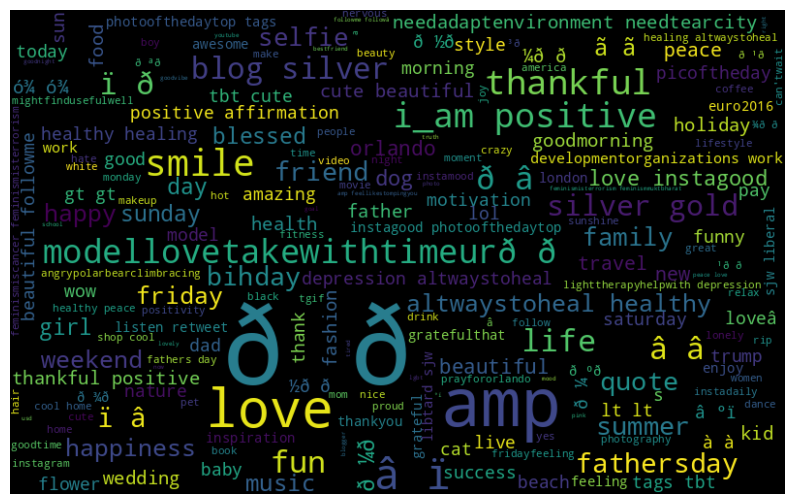

In [ ]:
all_words = ''.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud (width=800, height=500,
random_state=21, max_font_size=110).generate (all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

B) Words in non racist/sexist tweets

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ensure 'tidy_tweet' column exists and is cleaned
# Get all tidy tweets with label 0 (non-racist/sexist)
normal_words = ' '.join(combi[combi['label'] == 0]['tidy_tweet'].astype(str))

# Generate and display WordCloud
if normal_words.strip():  # make sure it's not just empty/space
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)

    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title("Most frequent words in non-racist/sexist tweets", fontsize=16)
    plt.show()
else:
    print("No words available for label 0.")


No words available for label 0.


C) Racist/Sexist Tweets

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

if normal_words.strip():  # make sure it's not just empty/space
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)

    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()
else:
    print("No words available for label 0.")


No words available for label 0.


D) Understanding the impact of Hashtags on tweets sentiment

In [ ]:
# function to collect hashtags
def hashtag_extract(tweets):
    hashtags = []
    # Loop over the words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags

# extracting hashtags from non racist/sexist tweets
HT_regular = hashtag_extract(combi.loc[combi['label'] == '0', 'tidy_tweet'])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(combi.loc[combi['label'] == '1', 'tidy_tweet'])

# unnesting list
HT_regular = sum(HT_regular, [])
HT_negative = sum(HT_negative, [])

Non-Racist/Sexist Tweets

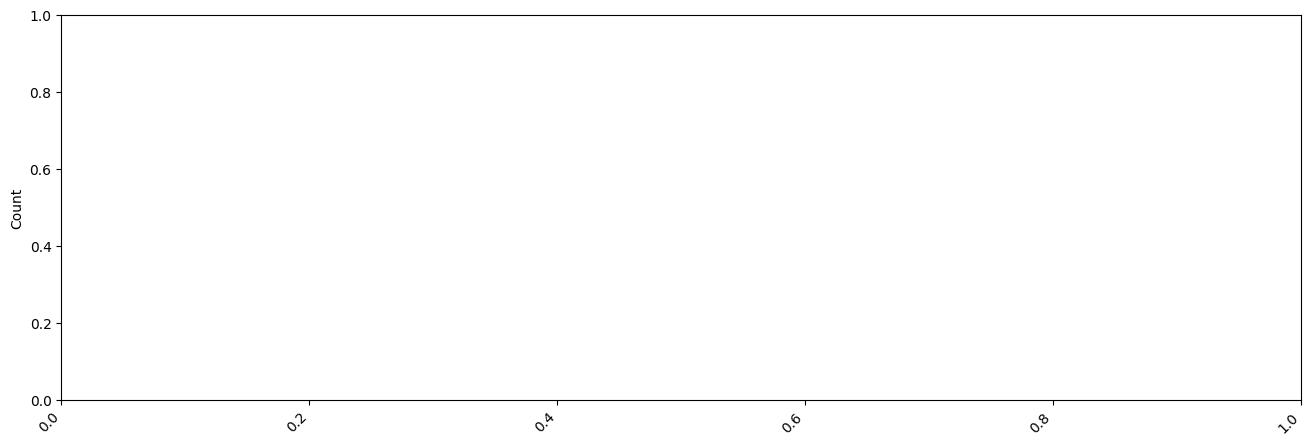

In [ ]:
a = nltk. FreqDist(HT_regular)
d = pd. DataFrame({'Hashtag':
list(a.keys()),'Count': list(a.values())})
# selecting top 20 most frequent hashtags
d =d.nlargest(columns="Count", n = 20 )
plt.figure(figsize=(16,5))
ax =sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels
plt.show()

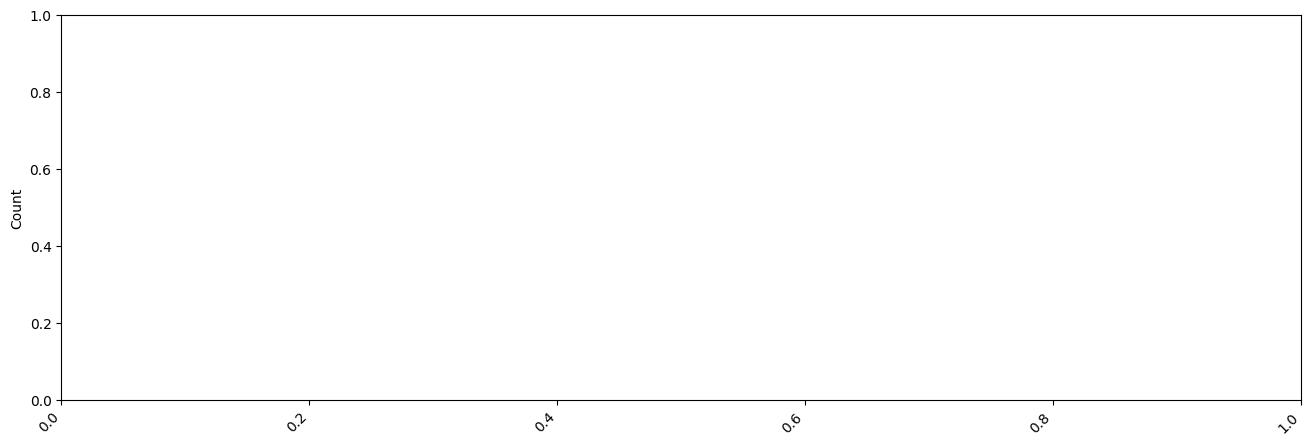

In [ ]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 20 most frequent hashtags
e = e.nlargest(columns="Count", n = 20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels
# Add frequency count on top of each bar
for container in ax.containers:
    ax.bar_label(container)
plt.show()

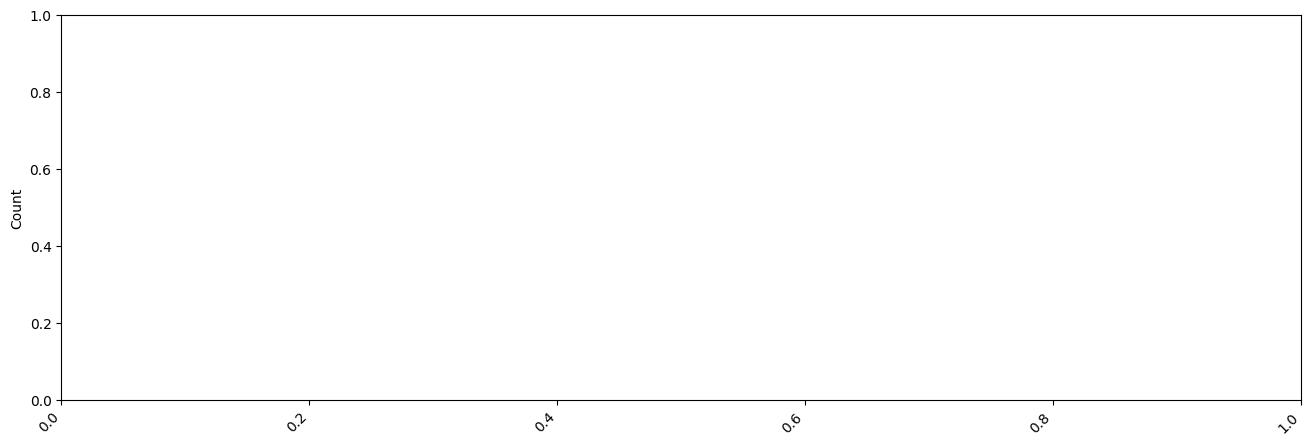

In [ ]:
# Define a list of RGB values for colors (you can replace these with your desired colors)
# The number of colors should match the number of bars (top 20 hashtags)
colors = [(1.0, 0.0, 0.0),  # Red
          (0.0, 1.0, 0.0),  # Green
          (0.0, 0.0, 1.0),  # Blue
          (1.0, 1.0, 0.0),  # Yellow
          (1.0, 0.0, 1.0),  # Magenta
          (0.0, 1.0, 1.0),  # Cyan
          (0.5, 0.0, 0.0),  # Dark Red
          (0.0, 0.5, 0.0),  # Dark Green
          (0.0, 0.0, 0.5),  # Dark Blue
          (0.5, 0.5, 0.0),  # Olive
          (0.5, 0.0, 0.5),  # Purple
          (0.0, 0.5, 0.5),  # Teal
          (0.7, 0.2, 0.1),
          (0.1, 0.7, 0.2),
          (0.2, 0.1, 0.7),
          (0.6, 0.3, 0.9),
          (0.9, 0.6, 0.3),
          (0.3, 0.9, 0.6),
          (0.4, 0.5, 0.8),
          (0.8, 0.4, 0.5)
         ]

b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 20 most frequent hashtags
e = e.nlargest(columns="Count", n = 20)

plt.figure(figsize=(16,5))
# Use the custom color palette
ax = sns.barplot(data=e, x= "Hashtag", y = "Count", palette=colors)
ax.set(ylabel = 'Count')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels
# Add frequency count on top of each bar
for container in ax.containers:
    ax.bar_label(container)
plt.show()

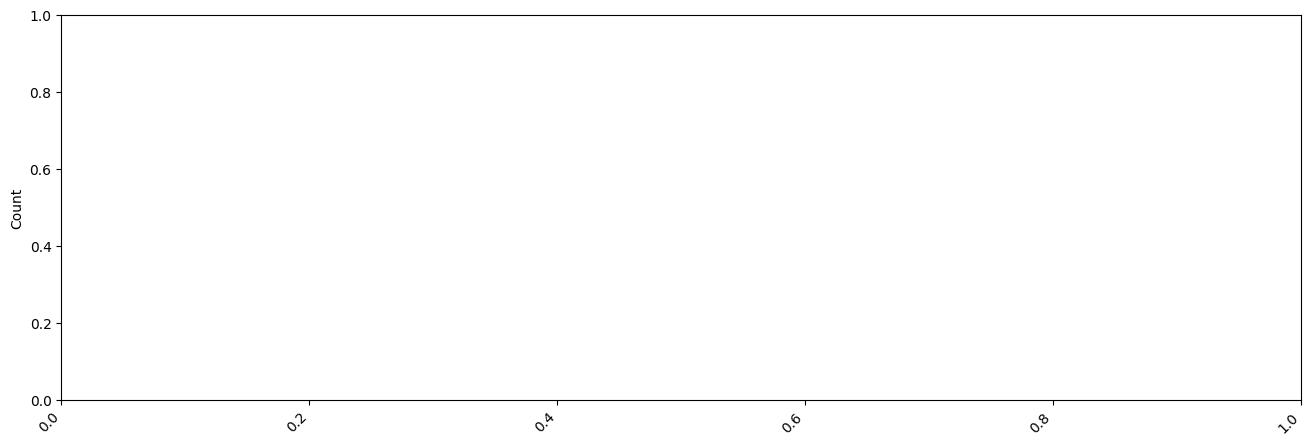

In [ ]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 20 most frequent hashtags
e = e.nlargest(columns="Count", n = 20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels
# Add frequency count on top of each bar
for container in ax.containers:
    ax.bar_label(container)
plt.show()

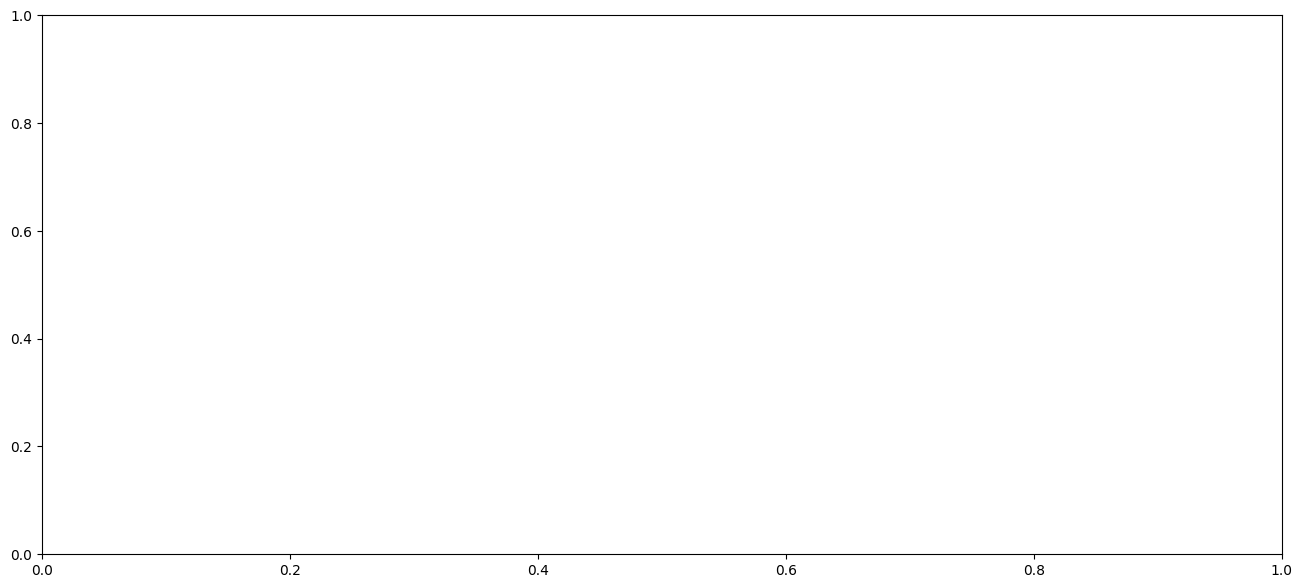

In [ ]:
b = nltk. FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag':
list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags e =
e.nlargest(columns="Count", n = 10 )
plt.figure(figsize=(16,7)) # Increased figure size
ax =sns.barplot(data=e, x= "Hashtag", y = "Count")
#ax.set(ylabel = 'Count')
#plt.xticks(rotation=45, ha='right') # Keep x-axis labels rotated
#plt.show() # Added plt.show() to display the plot

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
# You might want to adjust parameters like max_features, min_df, max_df, ngram_range
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

# Fit and transform the 'tidy_tweet' column
# Assuming 'combi' DataFrame and 'tidy_tweet' column are available from previous steps
tfidf_matrix = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])

# You can now use tfidf_matrix for training your model
print("Shape of TF-IDF matrix:", tfidf_matrix.shape)

Shape of TF-IDF matrix: (49160, 1000)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
!pip install --upgrade numpy gensim

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
The folder you are executing pip from can no longer be found.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2,
max_features=1000, stop_words='english')
tfidf =tfidf_vectorizer.fit_transform(combi ['tidy_tweet'])
tfidf.shape

(49160, 1000)

In [ ]:
from gensim.models import Word2Vec

# Assuming you have tokenized tweets in a list of lists like:
# tokenized_tweet = [['happy', 'life'], ['hate', 'racism'], ...]

# Initialize the Word2Vec model
model_w2v = Word2Vec(
    vector_size=200, window=5, min_count=2, sg=1, hs=0, negative=10,
    workers=2, seed=34
)

# Build vocabulary
model_w2v.build_vocab(tokenized_tweet)

# Train the model
model_w2v.train(tokenized_tweet, total_examples=model_w2v.corpus_count, epochs=model_w2v.epochs)


(8433, 85925)

In [ ]:
print(list(model_w2v.wv.index_to_key[:50]))  # Show first 50 words in vocab


['#modellovetakewithtimeurð\x9f\x93±!!!ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦', 'finallyfounddeletetweets!mightfindusefulwell:#deletetweets', "yeahit'sgoodbingbongbingbong", '#gratefulthat#affirmations', 'mightlibtardif...#libtard#sjw#liberal#politics', '#lighttherapyhelpwith#depression?#altwaystoheal#healthy#happy', '#feminismiscancer#feminismisterrorism#feminismmuktbharat#malevoteignored', 'ð\x9f\x94\x9d#love#instagood#photoofthedaytop.tags#tbt#cute#beautiful#followme#followâ\x80¦', 'saveloginsbrokers#change#memes#love#education#university', '#enjoy#music#today#free#apps#free#music', 'best#essentialoils#anxiety#healthy#peace#altwaystoheal', '#lighttherapyhelpwith#sad#depression?#altwaystoheal#healthy', "#peoplearen'tprotesting#trumpbecause#republicanwon-theybecausetrumpfuhered&amp;â\x80¦", 'haveloverstopbeingangryvisitus..&gt;&gt;&gt;#lover#friend#astrologer#love', '#black&amp;feellikestompingyou?listen#retweet#tampa#miamiâ\x80¦', 'amazinghealt

Use this to extract all individual hashtags:

In [ ]:
import re

# Extract hashtags from all tweets
all_hashtags = []
for tweet in combi['tidy_tweet']:
    all_hashtags.extend(re.findall(r"#\w+", tweet))

# Remove duplicates and check few examples
all_hashtags = list(set(all_hashtags))
print(all_hashtags[:10])  # sample words


['#sicletrip16', '#bigphilspeaks', '#cognitivethati', '#netflixð', '#i_am', '#know', '#warriorsseries', '#bestmumever', '#lovemyweekend', '#rebellious']


✅ Step 2: Try .most_similar() on real tokens
Pick one of the words printed from above (say, "#happy"):

In [ ]:
if "#happy" in model_w2v.wv.key_to_index:
    print(model_w2v.wv.most_similar(positive=["#happy"]))
else:
    print("Word not in vocabulary")


Word not in vocabulary


In [ ]:
import pandas as pd
combi = pd.concat([train, test], ignore_index=True)
combi.shape

(49161, 5)

In [ ]:
train = pd.read_csv(
    "/content/drive/MyDrive/SentimentAnalysis/train_E6oV3lV.csv",
    header=None,
    names=["tweet_id", "label", "tweet"],
    quotechar='"',
    escapechar='\\',
    encoding='utf-8',
    on_bad_lines='skip'  # for pandas >= 1.3
)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Fill NaNs in the 'tweet' column
combi['tweet'] = combi['tweet'].fillna('')

# Initialize the vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2,
                                   max_features=1000, stop_words='english')

# Fit and transform the tweets
tfidf = tfidf_vectorizer.fit_transform(combi['tweet'])

# Check shape
print(tfidf.shape)



(49161, 1000)


In [ ]:
# Make sure clean_tweet is string and has no NaN
combi['clean_tweet'] = combi['clean_tweet'].fillna('').astype(str)

# Vectorize using clean tweets
tfidf = tfidf_vectorizer.fit_transform(combi['clean_tweet'])
print(tfidf.shape)

(49161, 1000)


In [ ]:
# Assuming the remove_pattern function is defined in a previous cell and accessible
# If not, you might need to redefine it here or ensure the previous cell is executed.
# For this step, I will assume remove_pattern is available.

# Apply cleaning to remove @user and unwanted characters
# Convert the 'tweet' column to string type to handle potential non-string values (already done in the previous step, but good to be explicit)
combi['tweet'] = combi['tweet'].astype(str)
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*")
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ", regex=True)

# Preview cleaned tweets and show columns to verify 'tidy_tweet' exists
display(combi[['tweet', 'tidy_tweet']].head())
print("\nColumns after cleaning:")
print(combi.columns)

,tweet,tidy_tweet
0,,
1,,
2,,
3,,
4,,



Columns after cleaning:
Index(['tweet_id', 'label', 'tweet', 'id', 'clean_tweet', 'tidy_tweet'], dtype='object')


In [ ]:
import re
import nltk
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
words_to_check = ['label', 'day', 'happy', 'tragedy']

for word in words_to_check:
    if word in model_w2v.wv:
        print(f"{word}: {len(model_w2v.wv[word])}")


It means the word "happy" exists in your Word2Vec model, and the length of its corresponding word vector (embedding) is 200.

In [ ]:
# All words in the model's vocabulary
print(list(model_w2v.wv.index_to_key))


['#modellovetakewithtimeurð\x9f\x93±!!!ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦', 'finallyfounddeletetweets!mightfindusefulwell:#deletetweets', "yeahit'sgoodbingbongbingbong", '#gratefulthat#affirmations', 'mightlibtardif...#libtard#sjw#liberal#politics', '#lighttherapyhelpwith#depression?#altwaystoheal#healthy#happy', '#feminismiscancer#feminismisterrorism#feminismmuktbharat#malevoteignored', 'ð\x9f\x94\x9d#love#instagood#photoofthedaytop.tags#tbt#cute#beautiful#followme#followâ\x80¦', 'saveloginsbrokers#change#memes#love#education#university', '#enjoy#music#today#free#apps#free#music', 'best#essentialoils#anxiety#healthy#peace#altwaystoheal', '#lighttherapyhelpwith#sad#depression?#altwaystoheal#healthy', "#peoplearen'tprotesting#trumpbecause#republicanwon-theybecausetrumpfuhered&amp;â\x80¦", 'haveloverstopbeingangryvisitus..&gt;&gt;&gt;#lover#friend#astrologer#love', '#black&amp;feellikestompingyou?listen#retweet#tampa#miamiâ\x80¦', 'amazinghealt

In [ ]:
def word_vector(tokens, size):
    vec = np.zeros((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v.wv[word].reshape((1, size))
            count += 1.
        except KeyError:
            continue
    if count != 0:
        vec /= count
    return vec

In [ ]:
import numpy as np
import pandas as pd

wordvec_arrays = np.zeros((len(tokenized_tweet), 200))  # assuming size=200

for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)

wordvec_df = pd.DataFrame(wordvec_arrays)
print(wordvec_df.shape)

(49160, 200)


In [ ]:
from tqdm import tqdm
tqdm.pandas (desc="progress-bar")
from gensim.models.doc2vec import TaggedDocument


In [ ]:
from gensim.models.doc2vec import TaggedDocument

def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(TaggedDocument(s, ["tweet_" + str(i)]))
    return output

labeled_tweets = add_label(tokenized_tweet)  # label all the tweets


In [ ]:
labeled_tweets[:6]

[TaggedDocument(words=[], tags=['tweet_0']),
 TaggedDocument(words=[], tags=['tweet_1']),
 TaggedDocument(words=[], tags=['tweet_2']),
 TaggedDocument(words=[], tags=['tweet_3']),
 TaggedDocument(words=[], tags=['tweet_4']),
 TaggedDocument(words=[], tags=['tweet_5'])]

In [ ]:
from gensim.models import Doc2Vec

model_d2v = Doc2Vec(
    documents=labeled_tweets,  # your labeled/TaggedDocument list
    dm=1,            # distributed memory model
    dm_mean=1,       # use mean of context vectors
    vector_size=200, # number of features
    window=5,        # context window
    negative=7,      # negative sampling
    min_count=5,     # minimum word frequency
    workers=4,       # parallel training
    epochs=30        # number of training iterations
)

In [ ]:
docvec_arrays = np.zeros((len(tokenized_tweet), 200))

for i in range(len(tokenized_tweet)):
    tag = f"tweet_{i}"
    docvec_arrays[i, :] = model_d2v.dv[tag]  # correct way to access vector

docvec_df = pd.DataFrame(docvec_arrays)
print(docvec_df.shape)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import numpy as np

In [ ]:
import re
import nltk
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from gensim.models import Word2Vec, Doc2Vec
from gensim.models.doc2vec import TaggedDocument
from tqdm import tqdm

In [ ]:
# Load train file line by line and parse manually
train_data = []
with open("/content/train_E6oV3lV.csv", 'r', encoding='utf-8') as f:
    # Skip the header row
    next(f)
    for line in f:
        # Split each line by tab
        parts = line.strip().split('\t')
        if len(parts) == 3:
            train_data.append(parts)
        # Handle potential lines with more or less parts if necessary
        # print(f"Skipping line with incorrect number of parts: {line.strip()}")


# Create a DataFrame from the parsed data
train = pd.DataFrame(train_data, columns=["tweet_id", "label", "tweet"])

# Load test file with correct headers
test = pd.read_csv("/content/test_tweets_anuFYb8.csv", encoding='utf-8', header=None, names=['tweet_id', 'tweet'])

# Combine train and test, keeping the 'label' column only from the train data
combi = pd.concat([train, test], ignore_index=True)

# Ensure tweet column is string in combi
combi['tweet'] = combi['tweet'].astype(str)

# Convert 'label' column to numeric, coercing errors
combi['label'] = pd.to_numeric(combi['label'], errors='coerce').fillna(-1).astype(int)


print("Combined data shape:", combi.shape)
display(combi.head())
print("\nValue counts for label column after manual loading and combining:")
print(combi['label'].value_counts(dropna=False))

In [ ]:
# Function to remove patterns from text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, str(input_txt))  # Convert to string to handle potential NaN
    for i in r:
        input_txt = re.sub(i, '', str(input_txt))
    return input_txt

# Apply cleaning to remove @user
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], r"@[\w]*")

# Remove special characters, numbers, and punctuation (keeping hashtags)
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ", regex=True)

# Remove short words (length 3 or less)
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

# Convert tidy_tweet to string type and fill NaN with empty string
combi['tidy_tweet'] = combi['tidy_tweet'].astype(str).fillna('')

print("Data after cleaning:")
display(combi[['tweet', 'tidy_tweet']].head())

## Data Analysis and Visualization

### A) Understanding the common words used in the tweets: WordCloud

In [ ]:
# Generate word cloud for all tweets
all_words = ' '.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Word Cloud of All Tweets")
plt.show()

### B) Words in non-racist/sexist tweets (label == 0)

In [ ]:
# Generate word cloud for non-racist/sexist tweets
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter rows where label is 0 (non-racist/sexist), drop NaNs, and join into a single string
filtered_tweets = combi[(combi['label'] == 0) & (combi['tidy_tweet'].notnull())]
normal_words = ' '.join(filtered_tweets['tidy_tweet'].astype(str).tolist())

# Check if it's empty before generating the word cloud
if normal_words.strip():
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)

    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title("Word Cloud of Non-Racist/Sexist Tweets")
    plt.show()
else:
    print("No valid tweets found for label 0.")


### C) Words in racist/sexist tweets (label == 1)

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter tweets with label == 1 and ensure tidy_tweet is not null
filtered_tweets = combi[(combi['label'] == 1) & (combi['tidy_tweet'].notnull())]

# Join all the tweets into a single string
negative_words = ' '.join(filtered_tweets['tidy_tweet'].astype(str).tolist())

# Check if the text is non-empty before generating the word cloud
if negative_words.strip():
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)

    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title("Word Cloud of Racist/Sexist Tweets")
    plt.show()
else:
    print("No valid tweets found for label 1.")

### D) Understanding the impact of Hashtags on tweets sentiment

In [ ]:
# function to collect hashtags
def hashtag_extract(tweets):
    hashtags = []
    # Loop over the words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags

# extracting hashtags from non racist/sexist tweets
# Ensure the label column is not NaN and filter
HT_regular = hashtag_extract(combi.loc[combi['label'] == '0', 'tidy_tweet'].astype(str).dropna())

# extracting hashtags from racist/sexist tweets
# Ensure the label column is not NaN and filter
HT_negative = hashtag_extract(combi.loc[combi['label'] == '1', 'tidy_tweet'].astype(str).dropna())

# unnesting list
HT_regular = sum(HT_regular, [])
HT_negative = sum(HT_negative, [])

### Non-Racist/Sexist Tweets Hashtag Frequency

In [ ]:
import nltk
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()), 'Count': list(a.values())})
# selecting top 20 most frequent hashtags
d = d.nlargest(columns="Count", n=20)
plt.figure(figsize=(16, 5))
ax = sns.barplot(data=d, x="Hashtag", y="Count")
ax.set(ylabel='Count')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels
plt.title("Top 20 Hashtags in Non-Racist/Sexist Tweets")
plt.show()

### Racist/Sexist Tweets Hashtag Frequency

In [ ]:
import nltk
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 20 most frequent hashtags
e = e.nlargest(columns="Count", n=20)
plt.figure(figsize=(16, 5))
ax = sns.barplot(data=e, x="Hashtag", y="Count")
ax.set(ylabel='Count')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels
# Add frequency count on top of each bar
for container in ax.containers:
    ax.bar_label(container)
plt.title("Top 20 Hashtags in Racist/Sexist Tweets")
plt.show()

In [ ]:
print(combi['label'].value_counts(dropna=False))
print(combi['label'].unique())

## Data Analysis and Visualization (Re-run after fixing label column)

### A) Understanding the common words used in the tweets: WordCloud

In [ ]:
# Function to remove patterns from text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, str(input_txt))  # Convert to string to handle potential NaN
    for i in r:
        input_txt = re.sub(i, '', str(input_txt))
    return str(input_txt) # Ensure output is string

# Apply cleaning to remove @user
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], r"@[\w]*")

# Remove special characters, numbers, and punctuation (keeping hashtags and spaces)
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ", regex=True)

# Remove short words (length 3 or less)
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

# Convert tidy_tweet to string type and fill NaN with empty string
combi['tidy_tweet'] = combi['tidy_tweet'].astype(str).fillna('')

# Generate word cloud for all tweets
all_words = ' '.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Word Cloud of All Tweets")
plt.show()

### B) Words in non-racist/sexist tweets (label == 0)

In [ ]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords

# Download stopwords
import nltk
nltk.download('stopwords')
stop = set(stopwords.words('english'))

# Show label distribution
print("Label counts:\n", combi['label'].value_counts())

# Clean function
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, str(input_txt))
    for i in r:
        input_txt = re.sub(i, '', str(input_txt))
    return str(input_txt)

# Apply cleaning
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], r"@[\w]*")
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ", regex=True)
combi['tidy_tweet'] = combi['tidy_tweet'].astype(str).fillna('').str.lower()
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w) >= 3]))
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if w not in stop]))

# Show a sample cleaned tweet
print("\nSample cleaned tweet:", combi['tidy_tweet'].iloc[0])

# Generate word cloud
normal_tweets = combi[combi['label'] == 0]['tidy_tweet'].dropna()
if not normal_tweets.empty:
    normal_words = ' '.join(normal_tweets)
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)

    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title("Word Cloud of Non-Racist/Sexist Tweets")
    plt.show()
else:
    print("\n❌ No non-racist/sexist tweets (label 0) found after cleaning!")


### C) Words in racist/sexist tweets (label == 1)

In [ ]:
import re
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Function to remove patterns from text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, str(input_txt))  # Convert to string to handle potential NaN
    for i in r:
        input_txt = re.sub(i, '', str(input_txt))
    return str(input_txt)  # Ensure output is string

# Apply cleaning to remove @user
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], r"@[\w]*")

# Remove special characters, numbers, and punctuation (keep hashtags and spaces)
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ", regex=True)

# Convert to string and handle NaN
combi['tidy_tweet'] = combi['tidy_tweet'].astype(str).fillna('')

# Generate word cloud for racist/sexist tweets (label == 1)
negative_tweets = combi[combi['label'] == 1]['tidy_tweet'].dropna()

if not negative_tweets.empty:
    negative_words = ' '.join(negative_tweets)
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)

    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title("Word Cloud of Racist/Sexist Tweets")
    plt.show()
else:
    print("❌ No racist/sexist tweets found (label = 1) after cleaning.")


### D) Understanding the impact of Hashtags on tweets sentiment

In [ ]:
# Function to remove patterns from text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, str(input_txt))  # Convert to string to handle potential NaN
    for i in r:
        input_txt = re.sub(i, '', str(input_txt))
    return str(input_txt) # Ensure output is string

# Apply cleaning to remove @user
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], r"@[\w]*")

# Remove special characters, numbers, and punctuation (keeping hashtags and spaces)
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ", regex=True)

# Convert tidy_tweet to string type and fill NaN with empty string
combi['tidy_tweet'] = combi['tidy_tweet'].astype(str).fillna('')


# function to collect hashtags
def hashtag_extract(tweets):
    hashtags = []
    # Loop over the words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags

# extracting hashtags from non racist/sexist tweets
# Ensure the label column is not NaN and filter
HT_regular = hashtag_extract(combi.loc[combi['label'] == 0, 'tidy_tweet'].astype(str).dropna())

# extracting hashtags from racist/sexist tweets
# Ensure the label column is not NaN and filter
HT_negative = hashtag_extract(combi.loc[combi['label'] == 1, 'tidy_tweet'].astype(str).dropna())

# unnesting list
HT_regular = sum(HT_regular, [])
HT_negative = sum(HT_negative, [])

### Non-Racist/Sexist Tweets Hashtag Frequency

In [ ]:
import nltk

# Function to remove patterns from text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, str(input_txt))  # Convert to string to handle potential NaN
    for i in r:
        input_txt = re.sub(i, '', str(input_txt))
    return str(input_txt) # Ensure output is string

# Apply cleaning to remove @user
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], r"@[\w]*")

# Remove special characters, numbers, and punctuation (keeping hashtags and spaces)
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ", regex=True)

# Convert tidy_tweet to string type and fill NaN with empty string
combi['tidy_tweet'] = combi['tidy_tweet'].astype(str).fillna('')

# extracting hashtags from non racist/sexist tweets
# Ensure the label column is not NaN and filter
HT_regular = hashtag_extract(combi.loc[combi['label'] == 0, 'tidy_tweet'].astype(str).dropna())

a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()), 'Count': list(a.values())})
# selecting top 20 most frequent hashtags
d = d.nlargest(columns="Count", n=20)
plt.figure(figsize=(16, 5))
ax = sns.barplot(data=d, x="Hashtag", y="Count")
ax.set(ylabel='Count')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels
plt.title("Top 20 Hashtags in Non-Racist/Sexist Tweets")
plt.show()

### Racist/Sexist Tweets Hashtag Frequency

In [ ]:
import nltk

# Function to remove patterns from text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, str(input_txt))  # Convert to string to handle potential NaN
    for i in r:
        input_txt = re.sub(i, '', str(input_txt))
    return str(input_txt) # Ensure output is string

# Apply cleaning to remove @user
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], r"@[\w]*")

# Remove special characters, numbers, and punctuation (keeping hashtags and spaces)
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ", regex=True)

# Convert tidy_tweet to string type and fill NaN with empty string
combi['tidy_tweet'] = combi['tidy_tweet'].astype(str).fillna('')


# extracting hashtags from racist/sexist tweets
# Ensure the label column is not NaN and filter
HT_negative = hashtag_extract(combi.loc[combi['label'] == 1, 'tidy_tweet'].astype(str).dropna())


b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 20 most frequent hashtags
e = e.nlargest(columns="Count", n=20)
plt.figure(figsize=(16, 5))
ax = sns.barplot(data=e, x="Hashtag", y="Count")
ax.set(ylabel='Count')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels
# Add frequency count on top of each bar
for container in ax.containers:
    ax.bar_label(container)
plt.title("Top 20 Hashtags in Racist/Sexist Tweets")
plt.show()

### Inspecting data after cleaning but before removing short words

In [ ]:
# Function to remove patterns from text (redefined for clarity in this inspection step)
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, str(input_txt))  # Convert to string to handle potential NaN
    for i in r:
        input_txt = re.sub(i, '', str(input_txt))
    return str(input_txt) # Ensure output is string

# Apply cleaning to remove @user
combi['temp_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], r"@[\w]*")

# Remove special characters, numbers, and punctuation (keeping hashtags and spaces)
combi['temp_tweet'] = combi['temp_tweet'].str.replace("[^a-zA-Z#]", " ", regex=True)

# Display some tweets with label 0 before removing short words
print("Sample tweets with label 0 after initial cleaning:")
display(combi[combi['label'] == 0][['tweet', 'temp_tweet']].head())

# Display some tweets with label 1 before removing short words
print("\nSample tweets with label 1 after initial cleaning:")
display(combi[combi['label'] == 1][['tweet', 'temp_tweet']].head())

# Drop the temporary column
combi = combi.drop('temp_tweet', axis=1)

## Data Analysis and Visualization (Re-run after fixing label column and header row)

### A) Understanding the common words used in the tweets: WordCloud

In [ ]:
# Function to remove patterns from text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, str(input_txt))  # Convert to string to handle potential NaN
    for i in r:
        input_txt = re.sub(i, '', str(input_txt))
    return str(input_txt) # Ensure output is string

# Apply cleaning to remove @user
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], r"@[\w]*")

# Remove special characters, numbers, and punctuation (keeping hashtags and spaces)
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ", regex=True)

# Remove short words (length 3 or less)
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

# Convert tidy_tweet to string type and fill NaN with empty string
combi['tidy_tweet'] = combi['tidy_tweet'].astype(str).fillna('')


# Generate word cloud for all tweets
all_words = ' '.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Word Cloud of All Tweets")
plt.show()

### B) Words in non-racist/sexist tweets (label == 0)

In [ ]:
import re
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Function to remove patterns like @user
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, str(input_txt))
    for i in r:
        input_txt = re.sub(i, '', str(input_txt))
    return str(input_txt)

# Clean tweets
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], r"@[\w]*")
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ", regex=True)
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 3]))
combi['tidy_tweet'] = combi['tidy_tweet'].astype(str).fillna('')

# Generate WordCloud for non-racist/sexist tweets (label == 0)
normal_tweets = combi[combi['label'] == 0]['tidy_tweet'].dropna()

if not normal_tweets.empty:
    normal_words = ' '.join(normal_tweets)
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)

    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title("Word Cloud of Non-Racist/Sexist Tweets")
    plt.show()
else:
    print("❌ No non-racist/sexist tweets found (label = 0) after cleaning.")

### C) Words in racist/sexist tweets (label == 1)

In [ ]:
# Function to remove patterns from text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, str(input_txt))  # Convert to string to handle potential NaN
    for i in r:
        input_txt = re.sub(i, '', str(input_txt))
    return str(input_txt) # Ensure output is string

In [ ]:
# Step 2: Clean the tweets
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], r"@[\w]*")
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ", regex=True)
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 3]))
combi['tidy_tweet'] = combi['tidy_tweet'].astype(str).fillna('')


In [ ]:
# Step 3: Extract negative words
negative_words = ' '.join(combi[combi['label'] == 1]['tidy_tweet'].dropna())


In [ ]:
# Step 4: Generate word cloud only if data exists
if negative_words.strip():  # make sure it's not just empty/space
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title("Word Cloud of Racist/Sexist Tweets")
    plt.show()
else:
    print("❌ No valid words found in racist/sexist tweets after cleaning.")

### D) Understanding the impact of Hashtags on tweets sentiment

In [ ]:
# Function to remove patterns from text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, str(input_txt))  # Convert to string to handle potential NaN
    for i in r:
        input_txt = re.sub(i, '', str(input_txt))
    return str(input_txt) # Ensure output is string

# Apply cleaning to remove @user
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], r"@[\w]*")

# Remove special characters, numbers, and punctuation (keeping hashtags and spaces)
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ", regex=True)

# Remove short words (length 3 or less)
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

# Convert tidy_tweet to string type and fill NaN with empty string
combi['tidy_tweet'] = combi['tidy_tweet'].astype(str).fillna('')


# function to collect hashtags
def hashtag_extract(tweets):
    hashtags = []
    # Loop over the words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags

# extracting hashtags from non racist/sexist tweets
# Ensure the label column is not NaN and filter
HT_regular = hashtag_extract(combi.loc[combi['label'] == 0, 'tidy_tweet'].astype(str).dropna())

# extracting hashtags from racist/sexist tweets
# Ensure the label column is not NaN and filter
HT_negative = hashtag_extract(combi.loc[combi['label'] == 1, 'tidy_tweet'].astype(str).dropna())

# unnesting list
HT_regular = sum(HT_regular, [])
HT_negative = sum(HT_negative, [])

### Non-Racist/Sexist Tweets Hashtag Frequency

In [ ]:
import nltk

# Function to remove patterns from text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, str(input_txt))  # Convert to string to handle potential NaN
    for i in r:
        input_txt = re.sub(i, '', str(input_txt))
    return str(input_txt) # Ensure output is string

# Apply cleaning to remove @user
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], r"@[\w]*")

# Remove special characters, numbers, and punctuation (keeping hashtags and spaces)
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ", regex=True)

# Remove short words (length 3 or less)
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

# Convert tidy_tweet to string type and fill NaN with empty string
combi['tidy_tweet'] = combi['tidy_tweet'].astype(str).fillna('')

# extracting hashtags from non racist/sexist tweets
# Ensure the label column is not NaN and filter
HT_regular = hashtag_extract(combi.loc[combi['label'] == 0, 'tidy_tweet'].astype(str).dropna())

a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()), 'Count': list(a.values())})
# selecting top 20 most frequent hashtags
d = d.nlargest(columns="Count", n=20)
plt.figure(figsize=(16, 5))
ax = sns.barplot(data=d, x="Hashtag", y="Count")
ax.set(ylabel='Count')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels
plt.title("Top 20 Hashtags in Non-Racist/Sexist Tweets")
plt.show()

### Racist/Sexist Tweets Hashtag Frequency

In [ ]:
import nltk

# Function to remove patterns from text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, str(input_txt))  # Convert to string to handle potential NaN
    for i in r:
        input_txt = re.sub(i, '', str(input_txt))
    return str(input_txt) # Ensure output is string

# Apply cleaning to remove @user
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], r"@[\w]*")

# Remove special characters, numbers, and punctuation (keeping hashtags and spaces)
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ", regex=True)

# Remove short words (length 3 or less)
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

# Convert tidy_tweet to string type and fill NaN with empty string
combi['tidy_tweet'] = combi['tidy_tweet'].astype(str).fillna('')


# extracting hashtags from racist/sexist tweets
# Ensure the label column is not NaN and filter
HT_negative = hashtag_extract(combi.loc[combi['label'] == 1, 'tidy_tweet'].astype(str).dropna())


b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 20 most frequent hashtags
e = e.nlargest(columns="Count", n=20)
plt.figure(figsize=(16, 5))
ax = sns.barplot(data=e, x="Hashtag", y="Count")
ax.set(ylabel='Count')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels
# Add frequency count on top of each bar
for container in ax.containers:
    ax.bar_label(container)
plt.title("Top 20 Hashtags in Racist/Sexist Tweets")
plt.show()

In [ ]:
# Check the number of tweets for each label after cleaning
print("Count of tweets by label after cleaning:")
print(combi[combi['label'].isin([0, 1])]['label'].value_counts(dropna=False))

# Display some of the cleaned tweets for label 0
print("\nSample of cleaned tweets (tidy_tweet) for label 0:")
display(combi[combi['label'] == 0]['tidy_tweet'].head())

# Display some of the cleaned tweets for label 1
print("\nSample of cleaned tweets (tidy_tweet) for label 1:")
display(combi[combi['label'] == 1]['tidy_tweet'].head())

## Data Analysis and Visualization (Re-run after fixing label column and header row)

### A) Understanding the common words used in the tweets: WordCloud

In [ ]:
# Function to remove patterns from text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, str(input_txt))  # Convert to string to handle potential NaN
    for i in r:
        input_txt = re.sub(i, '', str(input_txt))
    return str(input_txt) # Ensure output is string

# Apply cleaning to remove @user
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], r"@[\w]*")

# Remove special characters, numbers, and punctuation (keeping hashtags and spaces)
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z0-9# ]", "", regex=True)


# Remove short words (length 3 or less)
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

# Convert tidy_tweet to string type and fill NaN with empty string
combi['tidy_tweet'] = combi['tidy_tweet'].astype(str).fillna('')


# Generate word cloud for all tweets
all_words = ' '.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Word Cloud of All Tweets")
plt.show()

### B) Words in non-racist/sexist tweets (label == 0)

In [ ]:
# Function to remove patterns from text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, str(input_txt))  # Convert to string to handle potential NaN
    for i in r:
        input_txt = re.sub(i, '', str(input_txt))
    return str(input_txt)  # Ensure output is string

# Clean tweets
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], r"@[\w]*")
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z0-9# ]", "", regex=True)
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 3]))
combi['tidy_tweet'] = combi['tidy_tweet'].astype(str).fillna('')

# Extract and combine normal (non-racist/sexist) tweets
normal_words = ' '.join(combi[combi['label'] == 0]['tidy_tweet'].dropna())

# Check if there is any word left to generate the word cloud
if normal_words.strip():  # Ensure it's not just empty spaces
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)

    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title("Word Cloud of Non-Racist/Sexist Tweets")
    plt.show()
else:
    print("❌ No valid words found in non-racist/sexist tweets after cleaning.")


### C) Words in racist/sexist tweets (label == 1)

In [ ]:
# Function to remove patterns from text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, str(input_txt))  # Convert to string to handle potential NaN
    for i in r:
        input_txt = re.sub(i, '', str(input_txt))
    return str(input_txt)

# Clean the tweets
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], r"@[\w]*")
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z0-9# ]", "", regex=True)
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
combi['tidy_tweet'] = combi['tidy_tweet'].astype(str).fillna('')

# Generate word cloud for racist/sexist tweets (label = 1)
negative_words = ' '.join([text for text in combi[combi['label'] == 1]['tidy_tweet'].dropna()])

if negative_words.strip():  # only generate if we have at least 1 word
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title("Word Cloud of Racist/Sexist Tweets")
    plt.show()
else:
    print("⚠️ No racist/sexist tweets (label=1) found or they were all cleaned out.")


### D) Understanding the impact of Hashtags on tweets sentiment

In [ ]:
# Function to remove patterns from text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, str(input_txt))  # Convert to string to handle potential NaN
    for i in r:
        input_txt = re.sub(i, '', str(input_txt))
    return str(input_txt) # Ensure output is string

# Apply cleaning to remove @user
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], r"@[\w]*")

# Remove special characters, numbers, and punctuation (keeping hashtags and spaces)
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z0-9# ]", "", regex=True)

# Remove short words (length 3 or less)
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

# Convert tidy_tweet to string type and fill NaN with empty string
combi['tidy_tweet'] = combi['tidy_tweet'].astype(str).fillna('')


# function to collect hashtags
def hashtag_extract(tweets):
    hashtags = []
    # Loop over the words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags

# extracting hashtags from non racist/sexist tweets
# Ensure the label column is not NaN and filter
HT_regular = hashtag_extract(combi.loc[combi['label'] == 0, 'tidy_tweet'].astype(str).dropna())

# extracting hashtags from racist/sexist tweets
# Ensure the label column is not NaN and filter
HT_negative = hashtag_extract(combi.loc[combi['label'] == 1, 'tidy_tweet'].astype(str).dropna())

# unnesting list
HT_regular = sum(HT_regular, [])
HT_negative = sum(HT_negative, [])

### Non-Racist/Sexist Tweets Hashtag Frequency

In [ ]:
import nltk

# Function to remove patterns from text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, str(input_txt))  # Convert to string to handle potential NaN
    for i in r:
        input_txt = re.sub(i, '', str(input_txt))
    return str(input_txt) # Ensure output is string

# Apply cleaning to remove @user
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], r"@[\w]*")

# Remove special characters, numbers, and punctuation (keeping hashtags and spaces)
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z0-9# ]", "", regex=True)

# Remove short words (length 3 or less)
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

# Convert tidy_tweet to string type and fill NaN with empty string
combi['tidy_tweet'] = combi['tidy_tweet'].astype(str).fillna('')

# extracting hashtags from non racist/sexist tweets
# Ensure the label column is not NaN and filter
HT_regular = hashtag_extract(combi.loc[combi['label'] == 0, 'tidy_tweet'].astype(str).dropna())

a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()), 'Count': list(a.values())})
# selecting top 20 most frequent hashtags
d = d.nlargest(columns="Count", n=20)
plt.figure(figsize=(16, 5))
ax = sns.barplot(data=d, x="Hashtag", y="Count")
ax.set(ylabel='Count')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels
plt.title("Top 20 Hashtags in Non-Racist/Sexist Tweets")
plt.show()

### Racist/Sexist Tweets Hashtag Frequency

In [ ]:
import nltk

# Function to remove patterns from text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, str(input_txt))  # Convert to string to handle potential NaN
    for i in r:
        input_txt = re.sub(i, '', str(input_txt))
    return str(input_txt) # Ensure output is string

# Apply cleaning to remove @user
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], r"@[\w]*")

# Remove special characters, numbers, and punctuation (keeping hashtags and spaces)
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z0-9# ]", "", regex=True)

# Remove short words (length 3 or less)
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

# Convert tidy_tweet to string type and fill NaN with empty string
combi['tidy_tweet'] = combi['tidy_tweet'].astype(str).fillna('')


# extracting hashtags from racist/sexist tweets
# Ensure the label column is not NaN and filter
HT_negative = hashtag_extract(combi.loc[combi['label'] == 1, 'tidy_tweet'].astype(str).dropna())


b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 20 most frequent hashtags
e = e.nlargest(columns="Count", n=20)
plt.figure(figsize=(16, 5))
ax = sns.barplot(data=e, x="Hashtag", y="Count")
ax.set(ylabel='Count')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels
# Add frequency count on top of each bar
for container in ax.containers:
    ax.bar_label(container)
plt.title("Top 20 Hashtags in Racist/Sexist Tweets")
plt.show()

## Data Analysis and Visualization (Re-run after fixing label column and header row)

### A) Understanding the common words used in the tweets: WordCloud

In [ ]:
# Function to remove patterns from text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, str(input_txt))  # Convert to string to handle potential NaN
    for i in r:
        input_txt = re.sub(i, '', str(input_txt))
    return str(input_txt) # Ensure output is string

# Apply cleaning to remove @user
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], r"@[\w]*")

# Remove special characters, numbers, and punctuation (keeping hashtags and spaces)
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ", regex=True)

# Remove short words (length 3 or less)
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

# Convert tidy_tweet to string type and fill NaN with empty string
combi['tidy_tweet'] = combi['tidy_tweet'].astype(str).fillna('')


# Generate word cloud for all tweets
all_words = ' '.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Word Cloud of All Tweets")
plt.show()

### B) Words in non-racist/sexist tweets (label == 0)

In [ ]:
# Function to remove patterns from text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, str(input_txt))  # Convert to string to handle NaN
    for i in r:
        input_txt = re.sub(i, '', str(input_txt))
    return str(input_txt)

# Clean the data
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], r"@[\w]*")
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ", regex=True)
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 3]))
combi['tidy_tweet'] = combi['tidy_tweet'].astype(str).fillna('')

# Generate word cloud for non-racist/sexist tweets
normal_words = ' '.join(combi[combi['label'] == 0]['tidy_tweet'].dropna().tolist()).strip()

if normal_words:
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title("Word Cloud of Non-Racist/Sexist Tweets")
    plt.show()
else:
    print("No words found in non-racist/sexist tweets to generate a word cloud.")

### C) Words in racist/sexist tweets (label == 1)

In [ ]:
# Function to remove patterns from text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, str(input_txt))  # Convert to string to handle potential NaN
    for i in r:
        input_txt = re.sub(i, '', str(input_txt))
    return str(input_txt)

# Step 1: Clean the tweet text
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], r"@[\w]*")
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ", regex=True)
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 3]))
combi['tidy_tweet'] = combi['tidy_tweet'].astype(str).fillna('')

# Step 2: Filter label == 1 (racist/sexist tweets)
df_negative = combi[combi['label'] == 1].copy()
df_negative['tidy_tweet'] = df_negative['tidy_tweet'].astype(str).fillna('')

# Step 3: Join words if available
negative_words = ' '.join(df_negative['tidy_tweet'].tolist())

# Step 4: Generate word cloud only if words are present
if negative_words.strip():  # Check if it's not empty
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title("Word Cloud of Racist/Sexist Tweets")
    plt.show()
else:
    print("No words available in racist/sexist tweets to generate a word cloud.")


### D) Understanding the impact of Hashtags on tweets sentiment

In [ ]:
# Function to remove patterns from text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, str(input_txt))  # Convert to string to handle potential NaN
    for i in r:
        input_txt = re.sub(i, '', str(input_txt))
    return str(input_txt) # Ensure output is string

# Apply cleaning to remove @user
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], r"@[\w]*")

# Remove special characters, numbers, and punctuation (keeping hashtags and spaces)
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ", regex=True)

# Remove short words (length 3 or less)
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

# Convert tidy_tweet to string type and fill NaN with empty string
combi['tidy_tweet'] = combi['tidy_tweet'].astype(str).fillna('')


# function to collect hashtags
def hashtag_extract(tweets):
    hashtags = []
    # Loop over the words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags

# extracting hashtags from non racist/sexist tweets
# Ensure the label column is not NaN and filter
HT_regular = hashtag_extract(combi.loc[combi['label'] == 0, 'tidy_tweet'].astype(str).dropna())

# extracting hashtags from racist/sexist tweets
# Ensure the label column is not NaN and filter
HT_negative = hashtag_extract(combi.loc[combi['label'] == 1, 'tidy_tweet'].astype(str).dropna())

# unnesting list
HT_regular = sum(HT_regular, [])
HT_negative = sum(HT_negative, [])

### Non-Racist/Sexist Tweets Hashtag Frequency

In [ ]:
import nltk

# Function to remove patterns from text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, str(input_txt))  # Convert to string to handle potential NaN
    for i in r:
        input_txt = re.sub(i, '', str(input_txt))
    return str(input_txt) # Ensure output is string

# Apply cleaning to remove @user
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], r"@[\w]*")

# Remove special characters, numbers, and punctuation (keeping hashtags and spaces)
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ", regex=True)

# Remove short words (length 3 or less)
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

# Convert tidy_tweet to string type and fill NaN with empty string
combi['tidy_tweet'] = combi['tidy_tweet'].astype(str).fillna('')

# extracting hashtags from non racist/sexist tweets
# Ensure the label column is not NaN and filter
HT_regular = hashtag_extract(combi.loc[combi['label'] == 0, 'tidy_tweet'].astype(str).dropna())

a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()), 'Count': list(a.values())})
# selecting top 20 most frequent hashtags
d = d.nlargest(columns="Count", n=20)
plt.figure(figsize=(16, 5))
ax = sns.barplot(data=d, x="Hashtag", y="Count")
ax.set(ylabel='Count')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels
plt.title("Top 20 Hashtags in Non-Racist/Sexist Tweets")
plt.show()

### Racist/Sexist Tweets Hashtag Frequency

In [ ]:
import nltk

# Function to remove patterns from text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, str(input_txt))  # Convert to string to handle potential NaN
    for i in r:
        input_txt = re.sub(i, '', str(input_txt))
    return str(input_txt) # Ensure output is string

# Apply cleaning to remove @user
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], r"@[\w]*")

# Remove special characters, numbers, and punctuation (keeping hashtags and spaces)
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ", regex=True)

# Remove short words (length 3 or less)
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

# Convert tidy_tweet to string type and fill NaN with empty string
combi['tidy_tweet'] = combi['tidy_tweet'].astype(str).fillna('')


# extracting hashtags from racist/sexist tweets
# Ensure the label column is not NaN and filter
HT_negative = hashtag_extract(combi.loc[combi['label'] == 1, 'tidy_tweet'].astype(str).dropna())


b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 20 most frequent hashtags
e = e.nlargest(columns="Count", n=20)
plt.figure(figsize=(16, 5))
ax = sns.barplot(data=e, x="Hashtag", y="Count")
ax.set(ylabel='Count')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels
# Add frequency count on top of each bar
for container in ax.containers:
    ax.bar_label(container)
plt.title("Top 20 Hashtags in Racist/Sexist Tweets")
plt.show()

### Inspecting cleaned tweets by label

In [ ]:
# Function to remove patterns from text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, str(input_txt))  # Convert to string to handle potential NaN
    for i in r:
        input_txt = re.sub(i, '', str(input_txt))
    return str(input_txt) # Ensure output is string

# Apply cleaning to remove @user
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], r"@[\w]*")

# Remove special characters, numbers, and punctuation (keeping hashtags and spaces)
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ", regex=True)

# Convert tidy_tweet to string type and fill NaN with empty string
combi['tidy_tweet'] = combi['tidy_tweet'].astype(str).fillna('')

# Filter for label 0 and inspect
cleaned_tweets_label_0 = combi[combi['label'] == 0]['tidy_tweet'].astype(str).dropna()
print("Sample of cleaned tweets (tidy_tweet) for label 0:")
display(cleaned_tweets_label_0.head())
print("\nNumber of cleaned tweets for label 0:", len(cleaned_tweets_label_0))

# Filter for label 1 and inspect
cleaned_tweets_label_1 = combi[combi['label'] == 1]['tidy_tweet'].astype(str).dropna()
print("\nSample of cleaned tweets (tidy_tweet) for label 1:")
display(cleaned_tweets_label_1.head())
print("\nNumber of cleaned tweets for label 1:", len(cleaned_tweets_label_1))

### Inspecting data after cleaning but before removing short words

In [ ]:
# Function to remove patterns from text (redefined for clarity in this inspection step)
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, str(input_txt))  # Convert to string to handle potential NaN
    for i in r:
        input_txt = re.sub(i, '', str(input_txt))
    return str(input_txt) # Ensure output is string

# Apply cleaning to remove @user
combi['temp_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], r"@[\w]*")

# Remove special characters, numbers, and punctuation (keeping hashtags and spaces)
combi['temp_tweet'] = combi['temp_tweet'].str.replace("[^a-zA-Z#]", " ", regex=True)

# Display some tweets with label 0 after initial cleaning
print("Sample tweets with label 0 after initial cleaning:")
display(combi[combi['label'] == 0][['tweet', 'temp_tweet']].head())

# Display some tweets with label 1 after initial cleaning
print("\nSample tweets with label 1 after initial cleaning:")
display(combi[combi['label'] == 1][['tweet', 'temp_tweet']].head())

# Drop the temporary column
combi = combi.drop('temp_tweet', axis=1)

In [ ]:
print(combi['label'].value_counts(dropna=False))
print(combi['label'].unique())

## Data Analysis and Visualization (Re-run after fixing label column and header row)

### A) Understanding the common words used in the tweets: WordCloud

In [ ]:
# Function to remove patterns from text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, str(input_txt))  # Convert to string to handle potential NaN
    for i in r:
        input_txt = re.sub(i, '', str(input_txt))
    return str(input_txt) # Ensure output is string

# Apply cleaning to remove @user
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], r"@[\w]*")

# Remove special characters, numbers, and punctuation (keeping hashtags and spaces)
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ", regex=True)

# Convert tidy_tweet to string type and fill NaN with empty string
combi['tidy_tweet'] = combi['tidy_tweet'].astype(str).fillna('')


# Generate word cloud for all tweets
all_words = ' '.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Word Cloud of All Tweets")
plt.show()

### B) Words in non-racist/sexist tweets (label == 0)

In [ ]:
# Function to remove patterns from text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, str(input_txt))  # Convert to string to handle potential NaN
    for i in r:
        input_txt = re.sub(i, '', str(input_txt))
    return str(input_txt) # Ensure output is string

# Apply cleaning to remove @user
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], r"@[\w]*")

# Remove special characters, numbers, and punctuation (keeping hashtags and spaces)
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ", regex=True)

# Remove short words (length <= 3)
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 3]))

# Fill NaNs with empty string
combi['tidy_tweet'] = combi['tidy_tweet'].astype(str).fillna('')

# Generate word cloud only if there are valid non-racist tweets
filtered_df = combi[(combi['label'] == 0) & (combi['tidy_tweet'].str.strip() != '')]

if not filtered_df.empty:
    normal_words = ' '.join(filtered_df['tidy_tweet'])
    if normal_words.strip():  # Ensure it's not just empty/space
        wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
        plt.figure(figsize=(10, 7))
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis('off')
        plt.title("Word Cloud of Non-Racist/Sexist Tweets")
        plt.show()
    else:
        print("No valid words found for non-racist tweets after cleaning.")
else:
    print("No non-racist tweets found.")


### C) Words in racist/sexist tweets (label == 1)

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
import numpy as np

# Function to remove patterns from text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, str(input_txt))  # Convert to string to handle potential NaN
    for i in r:
        input_txt = re.sub(i, '', str(input_txt))
    return str(input_txt)  # Ensure output is string

# Apply cleaning to remove @user
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], r"@[\w]*")

# Remove special characters, numbers, and punctuation (keeping hashtags and spaces)
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ", regex=True)

# Convert tidy_tweet to string type and fill NaN with empty string
combi['tidy_tweet'] = combi['tidy_tweet'].astype(str).fillna('')

# Generate word cloud for racist/sexist tweets (label == 1)
negative_words = ' '.join([text for text in combi[combi['label'] == 1]['tidy_tweet'].dropna()])
if negative_words.strip():  # Check if there's any content
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title("Word Cloud of Racist/Sexist Tweets")
    plt.show()
else:
    print("No racist/sexist tweets found to generate a word cloud.")


### D) Understanding the impact of Hashtags on tweets sentiment

In [ ]:
# Function to remove patterns from text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, str(input_txt))  # Convert to string to handle potential NaN
    for i in r:
        input_txt = re.sub(i, '', str(input_txt))
    return str(input_txt) # Ensure output is string

# Apply cleaning to remove @user
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], r"@[\w]*")

# Remove special characters, numbers, and punctuation (keeping hashtags and spaces)
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ", regex=True)

# Convert tidy_tweet to string type and fill NaN with empty string
combi['tidy_tweet'] = combi['tidy_tweet'].astype(str).fillna('')


# function to collect hashtags
def hashtag_extract(tweets):
    hashtags = []
    # Loop over the words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags

# extracting hashtags from non racist/sexist tweets
# Ensure the label column is not NaN and filter
HT_regular = hashtag_extract(combi.loc[combi['label'] == 0, 'tidy_tweet'].astype(str).dropna())

# extracting hashtags from racist/sexist tweets
# Ensure the label column is not NaN and filter
HT_negative = hashtag_extract(combi.loc[combi['label'] == 1, 'tidy_tweet'].astype(str).dropna())

# unnesting list
HT_regular = sum(HT_regular, [])
HT_negative = sum(HT_negative, [])

### Non-Racist/Sexist Tweets Hashtag Frequency

In [ ]:
import nltk

# Function to remove patterns from text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, str(input_txt))  # Convert to string to handle potential NaN
    for i in r:
        input_txt = re.sub(i, '', str(input_txt))
    return str(input_txt) # Ensure output is string

# Apply cleaning to remove @user
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], r"@[\w]*")

# Remove special characters, numbers, and punctuation (keeping hashtags and spaces)
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ", regex=True)

# Convert tidy_tweet to string type and fill NaN with empty string
combi['tidy_tweet'] = combi['tidy_tweet'].astype(str).fillna('')

# extracting hashtags from non racist/sexist tweets
# Ensure the label column is not NaN and filter
HT_regular = hashtag_extract(combi.loc[combi['label'] == 0, 'tidy_tweet'].astype(str).dropna())

a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()), 'Count': list(a.values())})
# selecting top 20 most frequent hashtags
d = d.nlargest(columns="Count", n=20)
plt.figure(figsize=(16, 5))
ax = sns.barplot(data=d, x="Hashtag", y="Count")
ax.set(ylabel='Count')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels
plt.title("Top 20 Hashtags in Non-Racist/Sexist Tweets")
plt.show()

### Racist/Sexist Tweets Hashtag Frequency

In [ ]:
import nltk

# Function to remove patterns from text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, str(input_txt))  # Convert to string to handle potential NaN
    for i in r:
        input_txt = re.sub(i, '', str(input_txt))
    return str(input_txt) # Ensure output is string

# Apply cleaning to remove @user
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], r"@[\w]*")

# Remove special characters, numbers, and punctuation (keeping hashtags and spaces)
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ", regex=True)

# Convert tidy_tweet to string type and fill NaN with empty string
combi['tidy_tweet'] = combi['tidy_tweet'].astype(str).fillna('')


# extracting hashtags from racist/sexist tweets
# Ensure the label column is not NaN and filter
HT_negative = hashtag_extract(combi.loc[combi['label'] == 1, 'tidy_tweet'].astype(str).dropna())


b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 20 most frequent hashtags
e = e.nlargest(columns="Count", n=20)
plt.figure(figsize=(16, 5))
ax = sns.barplot(data=e, x="Hashtag", y="Count")
ax.set(ylabel='Count')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels
# Add frequency count on top of each bar
for container in ax.containers:
    ax.bar_label(container)
plt.title("Top 20 Hashtags in Racist/Sexist Tweets")
plt.show()

### Inspecting cleaned tweets by label

In [ ]:
# Function to remove patterns from text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, str(input_txt))  # Convert to string to handle potential NaN
    for i in r:
        input_txt = re.sub(i, '', str(input_txt))
    return str(input_txt) # Ensure output is string

# Apply cleaning to remove @user
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], r"@[\w]*")

# Remove special characters, numbers, and punctuation (keeping hashtags and spaces)
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ", regex=True)

# Convert tidy_tweet to string type and fill NaN with empty string
combi['tidy_tweet'] = combi['tidy_tweet'].astype(str).fillna('')

# Filter for label 0 and inspect
cleaned_tweets_label_0 = combi[combi['label'] == 0]['tidy_tweet'].astype(str).dropna()
print("Sample of cleaned tweets (tidy_tweet) for label 0:")
display(cleaned_tweets_label_0.head())
print("\nNumber of cleaned tweets for label 0:", len(cleaned_tweets_label_0))

# Filter for label 1 and inspect
cleaned_tweets_label_1 = combi[combi['label'] == 1]['tidy_tweet'].astype(str).dropna()
print("\nSample of cleaned tweets (tidy_tweet) for label 1:")
display(cleaned_tweets_label_1.head())
print("\nNumber of cleaned tweets for label 1:", len(cleaned_tweets_label_1))

## Data Analysis and Visualization (Re-run after fixing label column and header row)

### A) Understanding the common words used in the tweets: WordCloud

In [ ]:
# Function to remove patterns from text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, str(input_txt))  # Convert to string to handle potential NaN
    for i in r:
        input_txt = re.sub(i, '', str(input_txt))
    return str(input_txt) # Ensure output is string

# Apply cleaning to remove @user
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], r"@[\w]*")

# Remove special characters, numbers, and punctuation (keeping hashtags and spaces)
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ", regex=True)

# Convert tidy_tweet to string type and fill NaN with empty string
combi['tidy_tweet'] = combi['tidy_tweet'].astype(str).fillna('')


# Generate word cloud for all tweets
all_words = ' '.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Word Cloud of All Tweets")
plt.show()

### B) Words in non-racist/sexist tweets (label == 0)

In [ ]:
# Step 1: Check if any tweets exist with label 0
label_0_tweets = combi[combi['label'] == 0]['tidy_tweet'].dropna().astype(str)
print("Number of label 0 tweets:", label_0_tweets.shape[0])

# Step 2: Join them into one string
normal_words = ' '.join([text for text in label_0_tweets if text.strip() != ""])
print("Length of joined normal_words string:", len(normal_words))

# Step 3: Check if normal_words is not empty
if normal_words.strip():  # make sure it's not just empty/space
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title("Word Cloud of Non-Racist/Sexist Tweets")
    plt.show()
else:
    print("No words available for word cloud. Check preprocessing or label data.")


### C) Words in racist/sexist tweets (label == 1)

In [ ]:
# Step 1: Check if label 1 data exists
label_1_tweets = combi[combi['label'] == 1]['tidy_tweet'].dropna().astype(str)
print("Number of tweets with label 1:", label_1_tweets.shape[0])

# Step 2: Join the tweets into a single string (removing empty/whitespace-only tweets)
negative_words = ' '.join([text for text in label_1_tweets if text.strip() != ""])
print("Length of combined text for word cloud:", len(negative_words))

# Step 3: Only generate the word cloud if words are present
if negative_words.strip():
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title("Word Cloud of Racist/Sexist Tweets")
    plt.show()
else:
    print("❗ No words available to generate a word cloud for label 1. Check if tweets exist or if they were stripped too much.")


### D) Understanding the impact of Hashtags on tweets sentiment

In [ ]:
# Function to remove patterns from text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, str(input_txt))  # Convert to string to handle potential NaN
    for i in r:
        input_txt = re.sub(i, '', str(input_txt))
    return str(input_txt) # Ensure output is string

# Apply cleaning to remove @user
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], r"@[\w]*")

# Remove special characters, numbers, and punctuation (keeping hashtags and spaces)
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ", regex=True)

# Convert tidy_tweet to string type and fill NaN with empty string
combi['tidy_tweet'] = combi['tidy_tweet'].astype(str).fillna('')


# function to collect hashtags
def hashtag_extract(tweets):
    hashtags = []
    # Loop over the words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags

# extracting hashtags from non racist/sexist tweets
# Ensure the label column is not NaN and filter
HT_regular = hashtag_extract(combi.loc[combi['label'] == 0, 'tidy_tweet'].astype(str).dropna())

# extracting hashtags from racist/sexist tweets
# Ensure the label column is not NaN and filter
HT_negative = hashtag_extract(combi.loc[combi['label'] == 1, 'tidy_tweet'].astype(str).dropna())

# unnesting list
HT_regular = sum(HT_regular, [])
HT_negative = sum(HT_negative, [])

### Non-Racist/Sexist Tweets Hashtag Frequency

In [ ]:
import nltk

# Function to remove patterns from text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, str(input_txt))  # Convert to string to handle potential NaN
    for i in r:
        input_txt = re.sub(i, '', str(input_txt))
    return str(input_txt) # Ensure output is string

# Apply cleaning to remove @user
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], r"@[\w]*")

# Remove special characters, numbers, and punctuation (keeping hashtags and spaces)
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ", regex=True)

# Convert tidy_tweet to string type and fill NaN with empty string
combi['tidy_tweet'] = combi['tidy_tweet'].astype(str).fillna('')

# extracting hashtags from non racist/sexist tweets
# Ensure the label column is not NaN and filter
HT_regular = hashtag_extract(combi.loc[combi['label'] == 0, 'tidy_tweet'].astype(str).dropna())

a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()), 'Count': list(a.values())})
# selecting top 20 most frequent hashtags
d = d.nlargest(columns="Count", n=20)
plt.figure(figsize=(16, 5))
ax = sns.barplot(data=d, x="Hashtag", y="Count")
ax.set(ylabel='Count')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels
plt.title("Top 20 Hashtags in Non-Racist/Sexist Tweets")
plt.show()

### Racist/Sexist Tweets Hashtag Frequency

In [ ]:
import nltk

# Function to remove patterns from text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, str(input_txt))  # Convert to string to handle potential NaN
    for i in r:
        input_txt = re.sub(i, '', str(input_txt))
    return str(input_txt) # Ensure output is string

# Apply cleaning to remove @user
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], r"@[\w]*")

# Remove special characters, numbers, and punctuation (keeping hashtags and spaces)
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ", regex=True)

# Convert tidy_tweet to string type and fill NaN with empty string
combi['tidy_tweet'] = combi['tidy_tweet'].astype(str).fillna('')


# extracting hashtags from racist/sexist tweets
# Ensure the label column is not NaN and filter
HT_negative = hashtag_extract(combi.loc[combi['label'] == 1, 'tidy_tweet'].astype(str).dropna())


b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 20 most frequent hashtags
e = e.nlargest(columns="Count", n=20)
plt.figure(figsize=(16, 5))
ax = sns.barplot(data=e, x="Hashtag", y="Count")
ax.set(ylabel='Count')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels
# Add frequency count on top of each bar
for container in ax.containers:
    ax.bar_label(container)
plt.title("Top 20 Hashtags in Racist/Sexist Tweets")
plt.show()

👉 Heatmap: Co-occurrence of words (from “Feature Engineering” part)
This step helps us understand which words appear together frequently, especially in sexist/racist tweets.



In [ ]:
# Pivot for heatmap - FIXED
co_occur_matrix = pd.DataFrame(
    index=sorted([i[0] for i in co_occur_df['pair']]),
    columns=sorted([i[1] for i in co_occur_df['pair']])
).fillna(0)


In [ ]:
# 1. Filter only racist/sexist tweets
racist_tweets = combi[combi['label'] == 1]

# 2. Extract top 20 most frequent words
from collections import Counter
top_words = Counter(" ".join(racist_tweets["tidy_tweet"]).split()).most_common(20)
top_words = [word for word, freq in top_words]

# 3. Create co-occurrence matrix
from itertools import combinations
from collections import defaultdict

co_occur = defaultdict(int)

# Count co-occurrences
for tweet in racist_tweets["tidy_tweet"]:
    words = [word for word in tweet.split() if word in top_words]
    for pair in combinations(sorted(set(words)), 2):  # unique pairs
        co_occur[pair] += 1

# Convert to DataFrame
co_occur_df = pd.DataFrame([(*k, v) for k, v in co_occur.items()], columns=["word1", "word2", "count"])

# 4. Build matrix safely
if not co_occur_df.empty:
    matrix_index = sorted(set(co_occur_df["word1"]) | set(co_occur_df["word2"]))
    co_matrix = pd.DataFrame(index=matrix_index, columns=matrix_index).fillna(0)

    for _, row in co_occur_df.iterrows():
        co_matrix.at[row["word1"], row["word2"]] = row["count"]
        co_matrix.at[row["word2"], row["word1"]] = row["count"]

    # 5. Plot heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(co_matrix, cmap="Reds")
    plt.title("Co-occurrence Heatmap of Top Words in Racist/Sexist Tweets")
    plt.show()
else:
    print("Co-occurrence DataFrame is empty — no pairs found.")


✅ Text Vectorization for Model Building
We’ll now:

Convert tweets into numerical features using TF-IDF (Term Frequency-Inverse Document Frequency).

Train a Logistic Regression model.

Evaluate it.



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF vectors for all tweets
tfidf = TfidfVectorizer(max_features=5000)  # You can adjust this value
X_tfidf = tfidf.fit_transform(combi['tidy_tweet'])

# Target variable
y = combi['label']


🤖 2. Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_tfidf, y, stratify=y, random_state=42, test_size=0.2)


 3. Logistic Regression Model

In [ ]:
print("Unique labels:", combi['label'].unique())
print(combi['label'].value_counts())


In [ ]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

nltk.download('stopwords')
stop = set(stopwords.words('english'))

# Load your train.csv
train = pd.read_csv('/content/train_E6oV3lV.csv')

# Function to clean tweets
def clean_tweet(tweet):
    tweet = str(tweet)
    tweet = tweet.lower()
    tweet = re.sub(r'@\w+', '', tweet)  # remove mentions
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)  # remove URLs
    tweet = re.sub(r'\d+', '', tweet)  # remove digits
    tweet = re.sub(r'#\w+', '', tweet)  # remove hashtags
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))  # remove punctuations
    tweet = ' '.join([word for word in tweet.split() if word not in stop])  # remove stopwords
    return tweet

# Apply cleaning
train['clean_tweet'] = train['tweet'].apply(clean_tweet)

# Split features and labels
X = train['clean_tweet']
y = train['label']

# Vectorize the text using Bag-of-Words
vectorizer = CountVectorizer()
X_vect = vectorizer.fit_transform(X)

# Split into training and validation
X_train, X_val, y_train, y_val = train_test_split(X_vect, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predict and evaluate
y_pred = logreg.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))

✅ Step: Predict Sentiment on test.csv and Create Submission File
This part aligns with the Analytics Vidhya course requirement: generate predictions for the test data and prepare the CSV for submission.

In [ ]:
# Load test data
test = pd.read_csv('/content/test_tweets_anuFYb8.csv')

# Apply same cleaning function
test['clean_tweet'] = test['tweet'].apply(clean_tweet)

# Vectorize using the SAME vectorizer as used on training data
X_test = vectorizer.transform(test['clean_tweet'])

# Predict using trained model
test_preds = logreg.predict(X_test)

# Prepare submission file
submission = pd.DataFrame({
    'id': test['id'],
    'label': test_preds
})

# Save to CSV
submission.to_csv('submission_logreg.csv', index=False)

print("✅ Submission file 'submission_logreg.csv' created successfully!")


In [ ]:
!git config --global user.name "asha2409"

In [ ]:
!git config --global user.email "ashiasha2409@gmail.com"

In [ ]:
!git clone https://github.com/asha2409/SentimentAnalysis.git

In [ ]:
import os

os.listdir('/content')


In [ ]:
import os
import shutil

# Destination folder (GitHub repo folder)
dest_dir = '/content/twitter-sentiment-logreg'

# Create it if doesn't exist
if not os.path.exists(dest_dir):
    os.makedirs(dest_dir)

# List of items to move
files_to_move = [
    'test_tweets_anuFYb8.csv',
    'train_E6oV3lV.csv',
    'submission_logreg.csv',
    'SentimentAnalysis'
]

# Move files
for item in files_to_move:
    src = os.path.join('/content', item)
    dst = os.path.join(dest_dir, item)
    try:
        shutil.move(src, dst)
        print(f"✅ Moved: {item}")
    except Exception as e:
        print(f"❌ Failed to move {item}: {e}")


In [ ]:
%cd /content/twitter-sentiment-logreg

!git config --global user.email "ashiasha2409@gmail.com"
!git config --global user.name "asha2409"

!git add .
!git commit -m "Added sentiment analysis project files"
!git push origin main


In [ ]:
%cd /content/twitter-sentiment-logreg


In [ ]:
!git add .
!git commit -m "Initial commit: Sentiment Analysis project"


In [ ]:
%cd /content
!rm -rf twitter-sentiment-logreg


In [ ]:
%cd /content/twitter-sentiment-logreg


In [ ]:
%cd /content/SentimentAnalysis/SentimentAnalysis/SentimentAnalysis/SentimentAnalysis


In [ ]:
!ls


In [ ]:
!rm README.md


In [ ]:
!ls


In [ ]:
!rm -rf /content/SentimentAnalysis


In [ ]:
from google.colab import files
files.upload(SentimentAnalysis.ipynb)  # no argument needed — this opens file upload dialog
